# Generating the House Price Dataset

Generated House Price Dataset:
   Size_SqFt  Num_Bedrooms  Age_Years   Price
0       1660             2         41  317103
1       2094             3          3  389992
2       1930             4         39  340662
3       1895             3          6  374082
4       2438             2          8  444649

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Size_SqFt     100 non-null    int32
 1   Num_Bedrooms  100 non-null    int32
 2   Age_Years     100 non-null    int32
 3   Price         100 non-null    int32
dtypes: int32(4)
memory usage: 1.7 KB


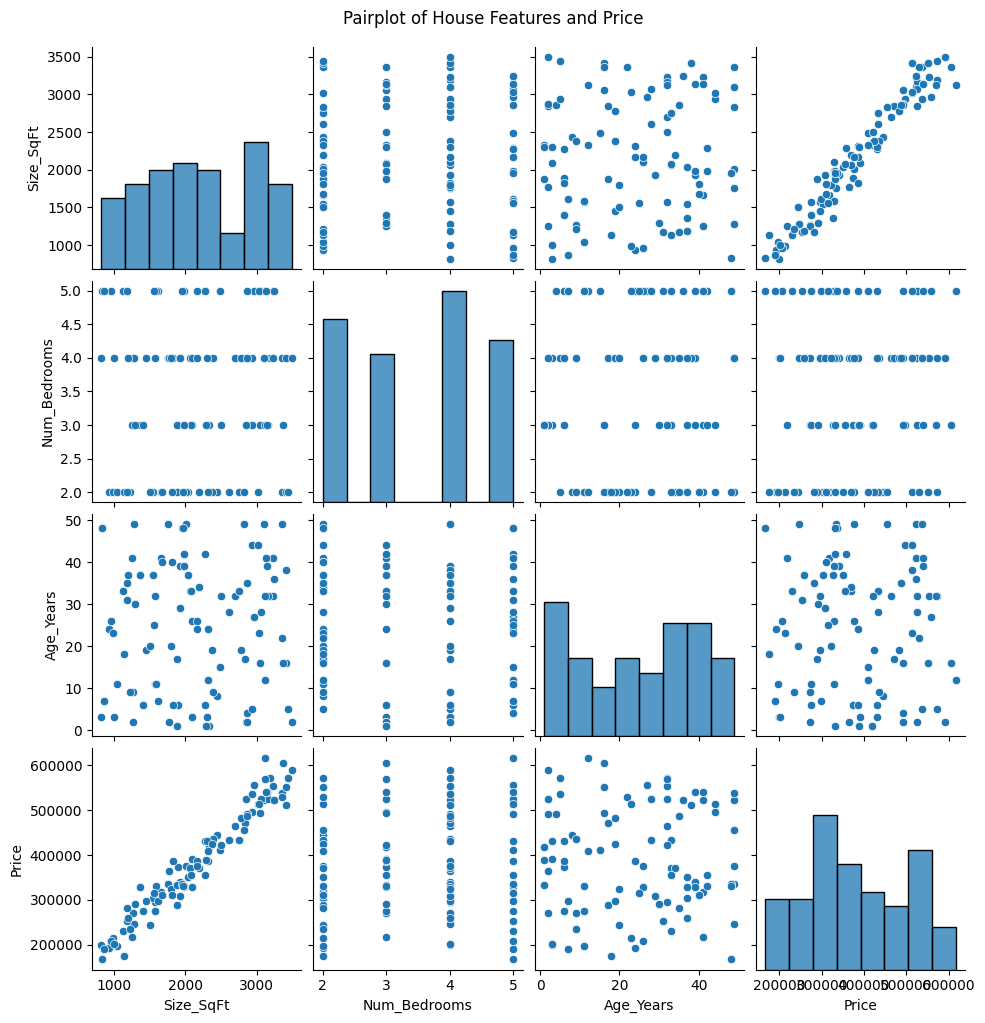


Training set size: 80 samples
Test set size: 20 samples


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate features
n_samples = 100
size_sqft = np.random.randint(800, 3500, n_samples)
num_bedrooms = np.random.randint(2, 6, n_samples)
age_years = np.random.randint(1, 50, n_samples)

# Generate price with some logic and noise
# Price = Base + (Size * Factor) + (Bedrooms * Factor) - (Age * Factor) + Noise
base_price = 50000
price = (base_price +
         size_sqft * 150 +
         num_bedrooms * 5000 -
         age_years * 300 +
         np.random.normal(0, 25000, n_samples)) # Adding noise

# Ensure price is not negative
price = np.maximum(price, 20000)

# Create DataFrame
df_house = pd.DataFrame({
    'Size_SqFt': size_sqft,
    'Num_Bedrooms': num_bedrooms,
    'Age_Years': age_years,
    'Price': price.astype(int) # Convert to integer for realism
})

# Display first few rows and info
print("Generated House Price Dataset:")
print(df_house.head())
print("\nDataset Info:")
df_house.info()

# Optional: Visualize relationships
sns.pairplot(df_house)
plt.suptitle("Pairplot of House Features and Price", y=1.02)
plt.show()

# Prepare data for models
X = df_house[['Size_SqFt', 'Num_Bedrooms', 'Age_Years']]
y = df_house['Price']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Linear


--- 1. Linear Regression ---
Coefficients (Size, Bedrooms, Age): [ 149.09 4661.72 -526.16]
Intercept: 59470.22
Mean Squared Error (MSE): 401516036.44
R-squared (R²): 0.9733


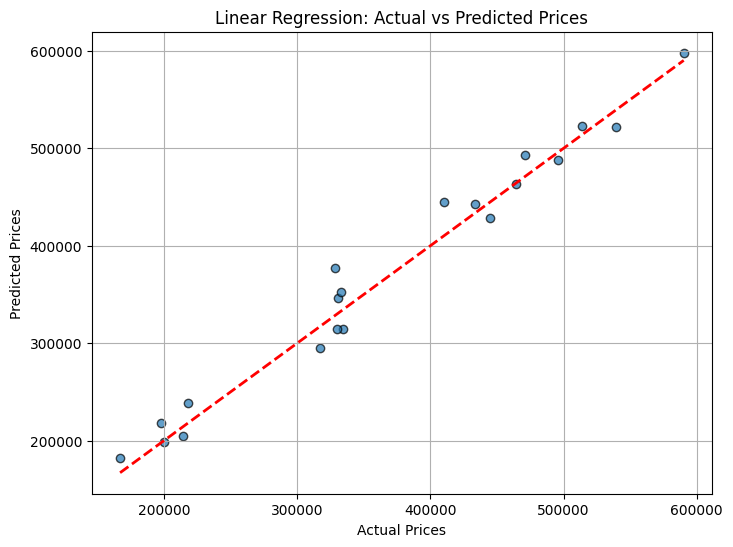

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported

print("\n--- 1. Linear Regression ---")

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Coefficients (Size, Bedrooms, Age): {np.round(lin_reg.coef_, 2)}")
print(f"Intercept: {lin_reg.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse_lin:.2f}")
print(f"R-squared (R²): {r2_lin:.4f}")

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.grid(True)
plt.show()

# Logistic


--- 2. Logistic Regression ---
Median House Price: 374627.50
Target Variable (y_binary) value counts:
Price
0    50
1    50
Name: count, dtype: int64

Accuracy: 0.9000

Confusion Matrix:
[[9 1]
 [1 9]]


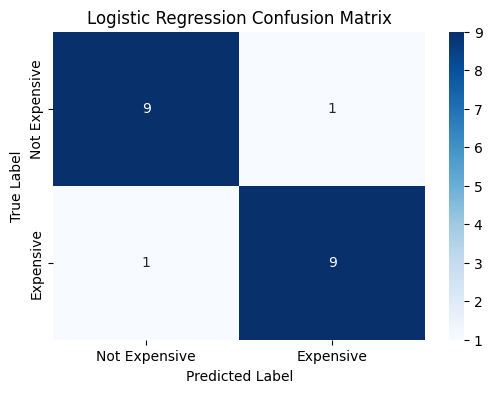


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np # Make sure numpy is imported
import seaborn as sns # Make sure seaborn is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported

print("\n--- 2. Logistic Regression ---")

# Create a binary target variable: Is the house price above the median?
median_price = df_house['Price'].median()
y_binary = (df_house['Price'] > median_price).astype(int) # 1 if > median, 0 otherwise
print(f"Median House Price: {median_price:.2f}")
print(f"Target Variable (y_binary) value counts:\n{y_binary.value_counts()}")

# Split data using the NEW binary target
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary) # Use stratify for classification

# Initialize the model
# Increase max_iter if it fails to converge
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test_log)
y_prob_log = log_reg.predict_proba(X_test_log)[:, 1] # Probability of class 1

# Evaluate the model
accuracy = accuracy_score(y_test_log, y_pred_log)
conf_matrix = confusion_matrix(y_test_log, y_pred_log)
class_report = classification_report(y_test_log, y_pred_log)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Expensive', 'Expensive'], yticklabels=['Not Expensive', 'Expensive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)
# Coefficients represent change in log-odds, harder to interpret directly than linear regression
# print(f"Coefficients (log-odds): {log_reg.coef_}")
# print(f"Intercept (log-odds): {log_reg.intercept_}")

# Polynomial


--- 3. Polynomial Regression ---
Using Polynomial Features of degree 2
Original number of features: 3
Number of features after polynomial transformation: 9

Mean Squared Error (MSE): 822305141.66
R-squared (R²): 0.9454
Improvement over Linear Regression R² (0.9733): -0.0279


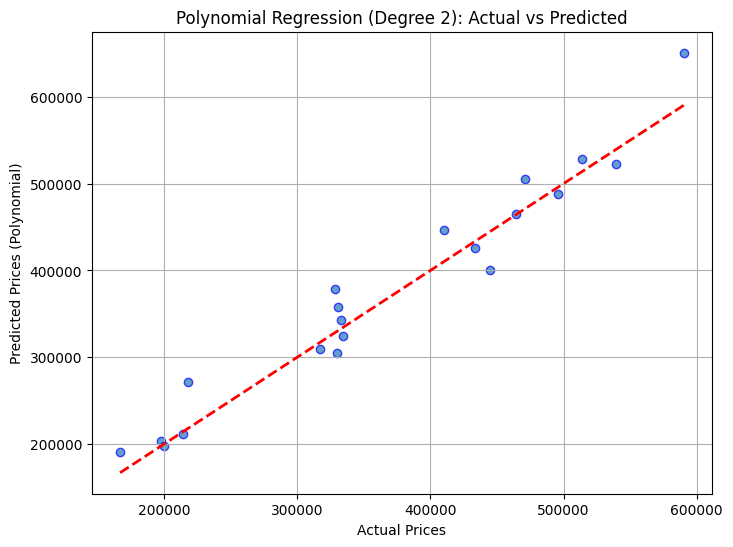

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Make sure numpy is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported

print("\n--- 3. Polynomial Regression ---")

# Choose the degree of the polynomial
degree = 2
print(f"Using Polynomial Features of degree {degree}")

# Create polynomial features
# include_bias=False because LinearRegression handles the intercept
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Display the number of features after transformation
print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of features after polynomial transformation: {X_train_poly.shape[1]}")
# print(f"Polynomial feature names: {poly_features.get_feature_names_out(X.columns)}") # See the generated features

# Train a Linear Regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"\nMean Squared Error (MSE): {mse_poly:.2f}")
print(f"R-squared (R²): {r2_poly:.4f}")

# Compare with Linear Regression R²
print(f"Improvement over Linear Regression R² ({r2_lin:.4f}): {r2_poly - r2_lin:.4f}")

# Visualize Predictions vs Actual (similar plot as Linear Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, edgecolors='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Polynomial)")
plt.title(f"Polynomial Regression (Degree {degree}): Actual vs Predicted")
plt.grid(True)
plt.show()

# Optional: Visualize the curve for one feature (e.g., Size_SqFt)
# This is more complex as we have multiple features. We'd need to hold other features constant.
# For simplicity, we just show the overall prediction accuracy above.

# Ridge Regression


--- 4. Ridge Regression ---
Using Ridge Regression with alpha=1.0

Coefficients (Scaled Features): [110863.56   5184.12  -7558.37]
Intercept: 390675.30
Mean Squared Error (MSE): 404785437.54
R-squared (R²): 0.9731

Comparison of Coefficients (Scaled Data):
Linear Regression: [112273.89   5211.63  -7798.84]
Ridge Regression (alpha=1.0): [110863.56   5184.12  -7558.37]


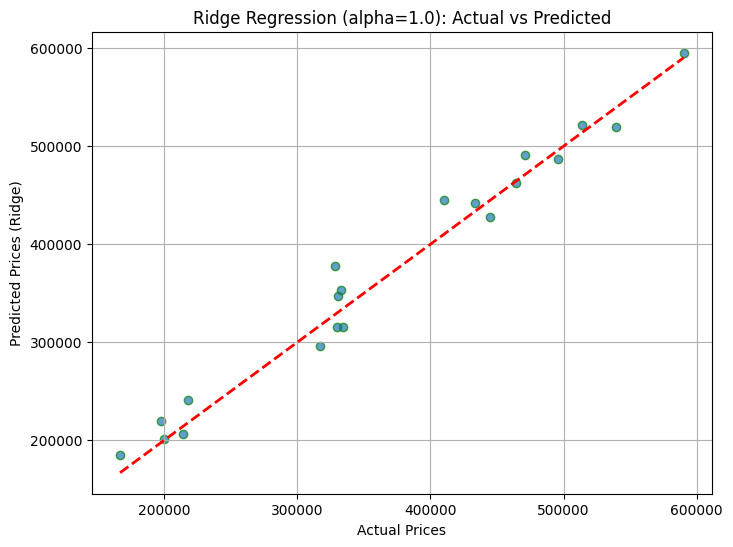

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Make sure numpy is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported

print("\n--- 4. Ridge Regression ---")

# Scale the features (IMPORTANT for Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform, not fit_transform on test data

# Initialize Ridge Regression model
# alpha controls the strength of regularization. Higher alpha = more shrinkage.
ridge_alpha = 1.0
print(f"Using Ridge Regression with alpha={ridge_alpha}")
ridge_reg = Ridge(alpha=ridge_alpha, random_state=42)

# Train the model
ridge_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nCoefficients (Scaled Features): {np.round(ridge_reg.coef_, 2)}") # Note these are for scaled features
print(f"Intercept: {ridge_reg.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R²): {r2_ridge:.4f}")

# Compare coefficients with standard Linear Regression (on scaled data for fair comparison)
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)
print(f"\nComparison of Coefficients (Scaled Data):")
print(f"Linear Regression: {np.round(lin_reg_scaled.coef_, 2)}")
print(f"Ridge Regression (alpha={ridge_alpha}): {np.round(ridge_reg.coef_, 2)}") # Ridge coeffs should be smaller in magnitude

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, edgecolors='g')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Ridge)")
plt.title(f"Ridge Regression (alpha={ridge_alpha}): Actual vs Predicted")
plt.grid(True)
plt.show()

# Lasso Regression


--- 5. Lasso Regression ---
Using Lasso Regression with alpha=100.0

Coefficients (Scaled Features): [112164.5    5118.04  -7691.13]
Number of non-zero coefficients: 3 out of 3
Intercept: 390675.30
Mean Squared Error (MSE): 400079814.23
R-squared (R²): 0.9734

Comparison of Coefficients (Scaled Data):
Lasso Regression (alpha=100.0): [112164.5    5118.04  -7691.13]


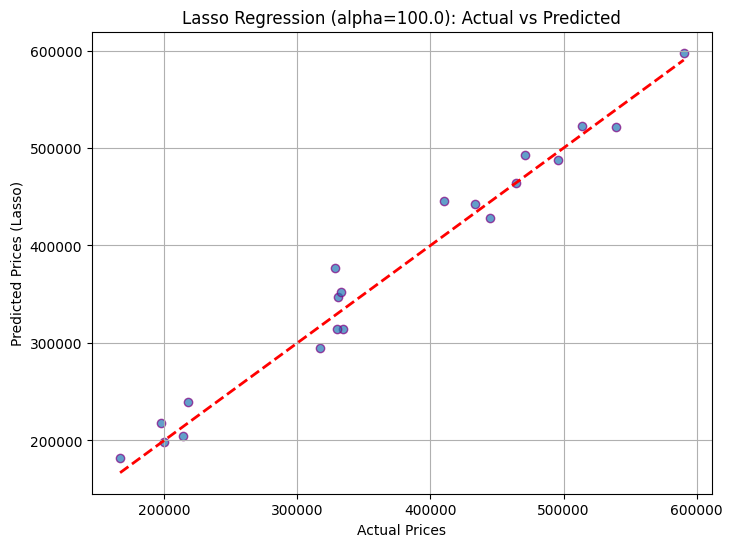

In [17]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler # Already imported, but good practice
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 5. Lasso Regression ---")

# Ensure features are scaled (use X_train_scaled, X_test_scaled from Ridge section)
# If not run previously, uncomment and run:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize Lasso Regression model
# alpha controls the strength of regularization. Higher alpha = more shrinkage & feature selection.
# Might need to adjust alpha; if alpha is too high, all coeffs might become zero.
# If alpha is too low, it behaves like Linear Regression.
lasso_alpha = 100.0 # Adjust alpha as needed, start higher for Lasso usually
print(f"Using Lasso Regression with alpha={lasso_alpha}")
lasso_reg = Lasso(alpha=lasso_alpha, random_state=42, max_iter=10000) # Increase max_iter if needed

# Train the model
lasso_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nCoefficients (Scaled Features): {np.round(lasso_reg.coef_, 2)}") # Check for zero coefficients
print(f"Number of non-zero coefficients: {np.sum(lasso_reg.coef_ != 0)} out of {X_train_scaled.shape[1]}")
print(f"Intercept: {lasso_reg.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared (R²): {r2_lasso:.4f}")

# Compare coefficients with Ridge (ensure Ridge was run with scaled data)
print(f"\nComparison of Coefficients (Scaled Data):")
# print(f"Ridge Regression (alpha={ridge_alpha}): {np.round(ridge_reg.coef_, 2)}") # Requires ridge_reg object
print(f"Lasso Regression (alpha={lasso_alpha}): {np.round(lasso_reg.coef_, 2)}")

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, edgecolors='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Lasso)")
plt.title(f"Lasso Regression (alpha={lasso_alpha}): Actual vs Predicted")
plt.grid(True)
plt.show()


--- 6. Quantile Regression ---

Training Quantile Regressor for quantile=0.1
Quantile: 0.1
  Mean Pinball Loss: 4151.78
  R-squared (R²): 0.9153

Training Quantile Regressor for quantile=0.5
Quantile: 0.5
  Mean Pinball Loss: 8643.96
  R-squared (R²): 0.9721

Training Quantile Regressor for quantile=0.9
Quantile: 0.9
  Mean Pinball Loss: 3650.17
  R-squared (R²): 0.8801


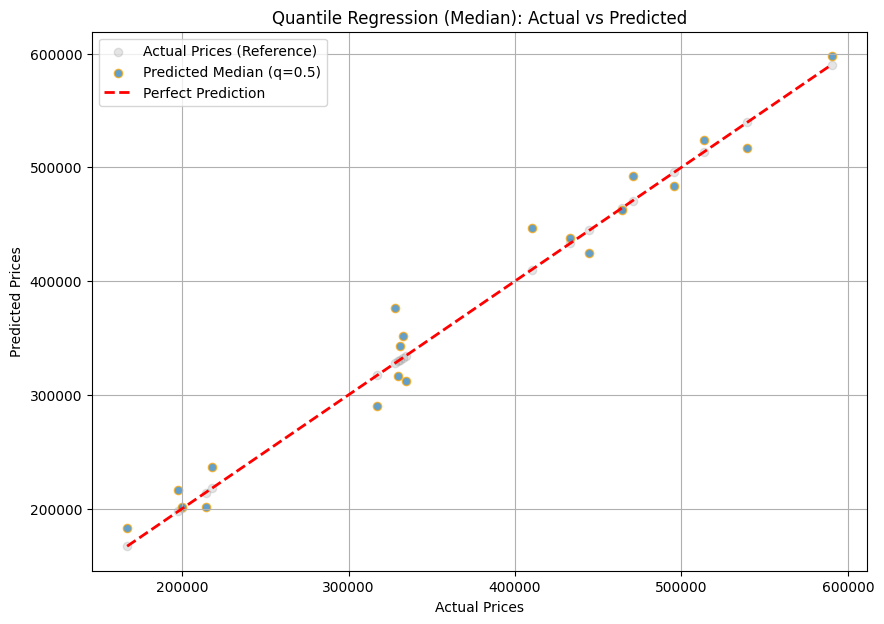

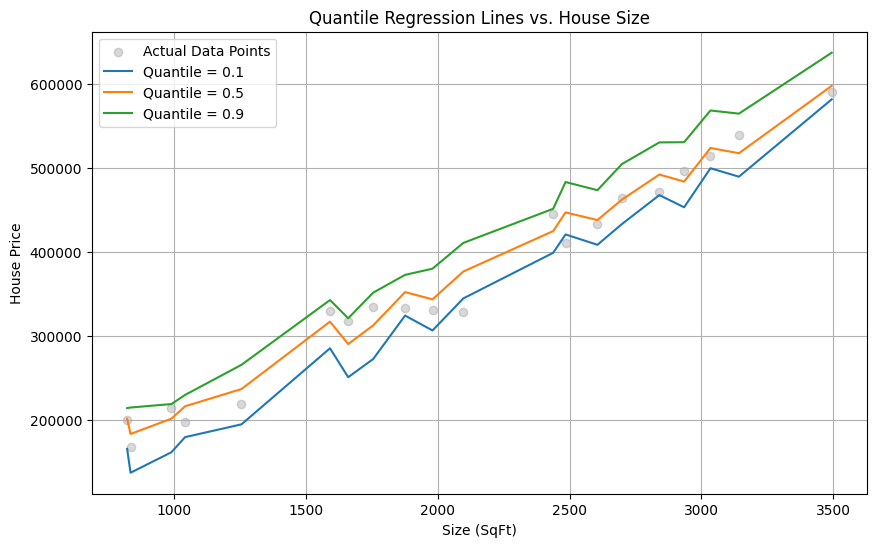

In [42]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_pinball_loss, r2_score # Pinball loss is typical for quantile regression
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 6. Quantile Regression ---")

# We don't necessarily need scaling, but it doesn't hurt
# We'll use the original features X_train, X_test for simplicity here.

# Define the quantile(s) we want to predict
quantiles = [0.1, 0.5, 0.9] # Predict 10th, 50th (median), and 90th percentiles
predictions_qr = {}
r2_scores_qr = {}

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test, alpha=0.2, color='gray', label='Actual Prices (Reference)') # Plot actuals for reference

for quantile in quantiles:
    print(f"\nTraining Quantile Regressor for quantile={quantile}")
    # Requires solver='highs' or related solvers for newer scikit-learn versions
    # solver options: 'highs-ds', 'highs-ipm', 'highs', 'interior-point', 'revised simplex'
    # 'highs' is often a good default.
    try:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver='highs') # alpha=0 means no regularization
    except ValueError as e:
        print(f"Solver 'highs' might not be available. Trying 'interior-point'. Error: {e}")
        try:
            qr = QuantileRegressor(quantile=quantile, alpha=0, solver='interior-point')
        except ValueError as e2:
             print(f"Solver 'interior-point' also failed. Trying 'revised simplex'. Error: {e2}")
             qr = QuantileRegressor(quantile=quantile, alpha=0, solver='revised simplex') # Fallback

    # Train the model
    qr.fit(X_train, y_train)

    # Make predictions
    y_pred_qr = qr.predict(X_test)
    predictions_qr[quantile] = y_pred_qr

    # Evaluate - R² can still be calculated, but pinball loss is specific to quantiles
    pinball = mean_pinball_loss(y_test, y_pred_qr, alpha=quantile)
    r2_qr = r2_score(y_test, y_pred_qr) # R2 might be less meaningful here, especially for outer quantiles
    r2_scores_qr[quantile] = r2_qr

    print(f"Quantile: {quantile}")
    print(f"  Mean Pinball Loss: {pinball:.2f}")
    print(f"  R-squared (R²): {r2_qr:.4f}")
    # print(f"  Coefficients: {np.round(qr.coef_, 2)}")
    # print(f"  Intercept: {qr.intercept_:.2f}")

    # Plot predictions for this quantile
    # Scatter plot can become messy with multiple quantiles. Let's plot quantile lines against one feature.
    # We'll plot Actual vs Predicted scatter for the median (0.5 quantile)
    if quantile == 0.5:
         plt.scatter(y_test, y_pred_qr, alpha=0.7, edgecolors='orange', label=f'Predicted Median (q={quantile})')

# Add perfect prediction line and labels to the median plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Quantile Regression (Median): Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize how predictions for different quantiles vary for a feature
# Sort test data by one feature (e.g., Size_SqFt) to see the lines clearly
sort_idx = np.argsort(X_test['Size_SqFt'])
X_test_sorted = X_test.iloc[sort_idx]
y_test_sorted = y_test.iloc[sort_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted['Size_SqFt'], y_test_sorted, alpha=0.3, color='gray', label='Actual Data Points')
for quantile, y_pred_qr in predictions_qr.items():
    y_pred_sorted = y_pred_qr[sort_idx] # Sort predictions according to sorted X_test
    plt.plot(X_test_sorted['Size_SqFt'], y_pred_sorted, label=f'Quantile = {quantile}')

plt.xlabel("Size (SqFt)")
plt.ylabel("House Price")
plt.title("Quantile Regression Lines vs. House Size")
plt.legend()
plt.grid(True)
plt.show()


--- 7. Decision Tree Regression ---
Using Decision Tree Regressor with max_depth=5, min_samples_leaf=5

Mean Squared Error (MSE): 633248516.78
R-squared (R²): 0.9580


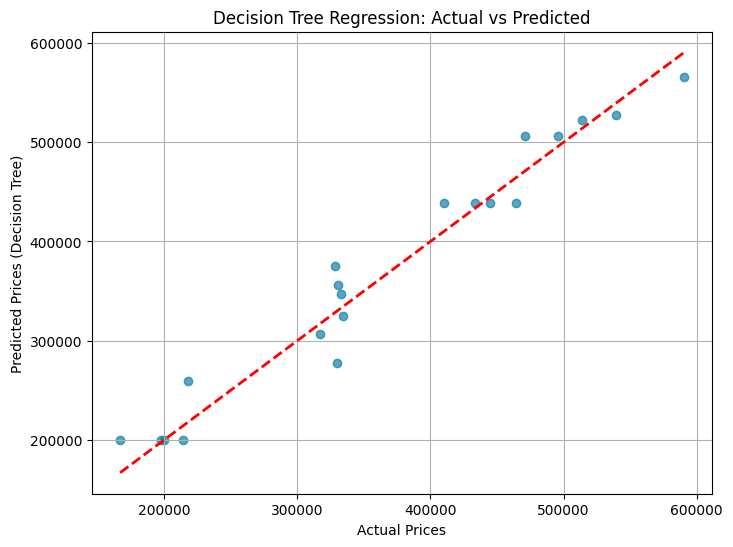

In [40]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("\n--- 7. Decision Tree Regression ---")

# Initialize Decision Tree Regressor model
# Control complexity to prevent overfitting:
# max_depth: Maximum depth of the tree
# min_samples_split: Minimum number of samples required to split an internal node
# min_samples_leaf: Minimum number of samples required to be at a leaf node
dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
print(f"Using Decision Tree Regressor with max_depth={dt_reg.max_depth}, min_samples_leaf={dt_reg.min_samples_leaf}")

# Train the model (no scaling needed)
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"\nMean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R²): {r2_dt:.4f}")

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, edgecolors='darkcyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Optional: Visualize the tree structure (can be large)
# plt.figure(figsize=(20,10))
# plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=3) # Limit depth for visualization
# plt.title("Decision Tree Structure (Top Levels)")
# plt.show()


--- 8. Random Forest Regression ---
Using Random Forest Regressor with n_estimators=100, max_depth=10, min_samples_leaf=5

Mean Squared Error (MSE): 628716906.01
R-squared (R²): 0.9583

Feature Importances:
Size_SqFt       0.994057
Age_Years       0.005480
Num_Bedrooms    0.000463
dtype: float64


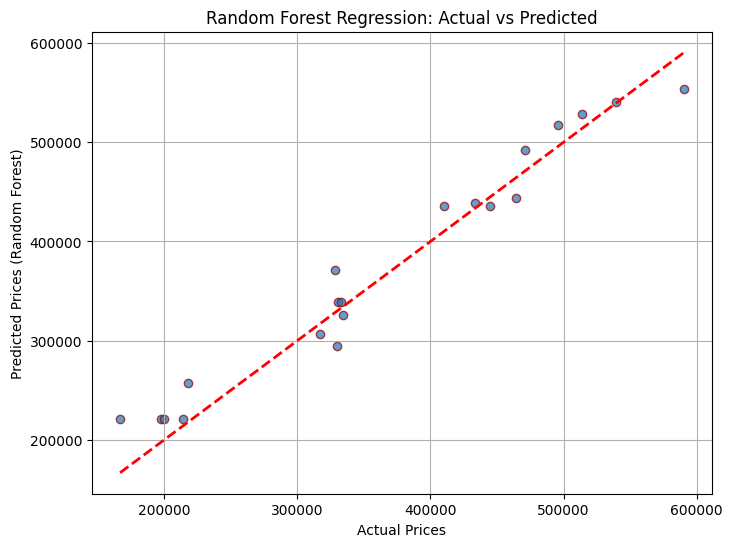

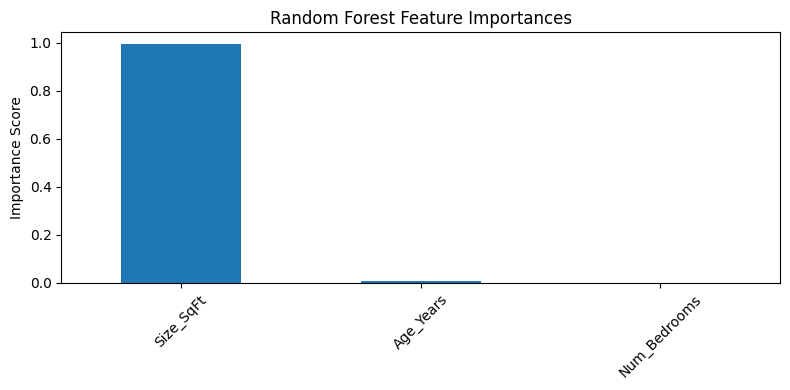

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

print("\n--- 8. Random Forest Regression ---")

# Initialize Random Forest Regressor model
# n_estimators: Number of trees in the forest
# max_features: Number of features to consider when looking for the best split
# Other parameters like max_depth, min_samples_leaf can also be used
rf_reg = RandomForestRegressor(n_estimators=100, # More trees generally better, up to a point
                               max_depth=10,      # Control complexity
                               min_samples_leaf=5, # Control complexity
                               random_state=42,
                               n_jobs=-1) # Use all available CPU cores
print(f"Using Random Forest Regressor with n_estimators={rf_reg.n_estimators}, max_depth={rf_reg.max_depth}, min_samples_leaf={rf_reg.min_samples_leaf}")

# Train the model (no scaling needed)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nMean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")

# Feature Importances (how much each feature contributes on average across all trees)
importances = rf_reg.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\nFeature Importances:")
print(forest_importances)

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, edgecolors='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# Plot Feature Importances
plt.figure(figsize=(8, 4))
forest_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- 9. Support Vector Regression (SVR) ---
Using SVR with kernel=rbf, C=100, epsilon=0.1

Mean Squared Error (MSE): 14982424981.51
R-squared (R²): 0.0055


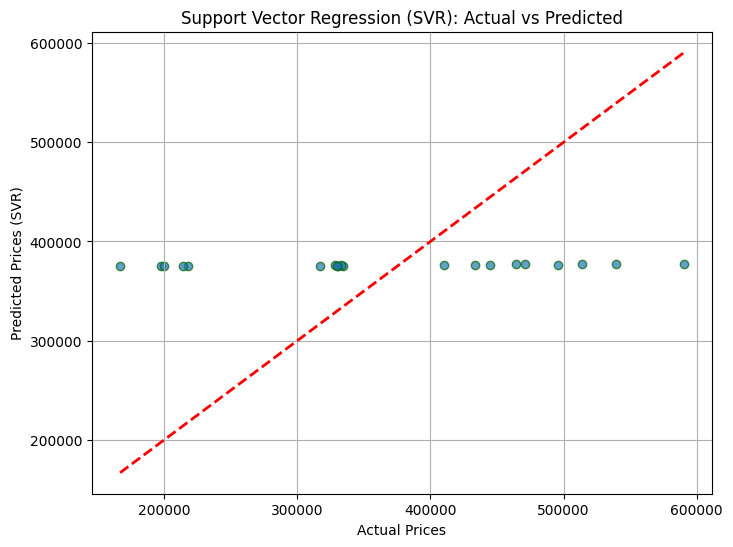

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # Already imported
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

print("\n--- 9. Support Vector Regression (SVR) ---")

# Ensure features are scaled (use X_train_scaled, X_test_scaled)
# scaler = StandardScaler() # Define/fit if not already done
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize SVR model
# Common kernels: 'linear', 'poly', 'rbf' (Radial Basis Function - default, good for non-linearity)
# C: Regularization parameter. Larger C = less regularization.
# epsilon: Defines the margin of tolerance where no penalty is given to errors.
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1) # Parameters often need tuning
print(f"Using SVR with kernel={svr_reg.kernel}, C={svr_reg.C}, epsilon={svr_reg.epsilon}")

# Train the model
svr_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_reg.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"\nMean Squared Error (MSE): {mse_svr:.2f}")
print(f"R-squared (R²): {r2_svr:.4f}") # Note: SVR R² can sometimes be poor if not tuned well

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.7, edgecolors='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (SVR)")
plt.title("Support Vector Regression (SVR): Actual vs Predicted")
plt.grid(True)
plt.show()


--- 10. Elastic Net Regression ---
Using Elastic Net Regression with alpha=0.1, l1_ratio=0.5

Coefficients (Scaled Features): [106839.49   5099.51  -6891.89]
Number of non-zero coefficients: 3 out of 3
Intercept: 390675.30
Mean Squared Error (MSE): 441142301.28
R-squared (R²): 0.9707


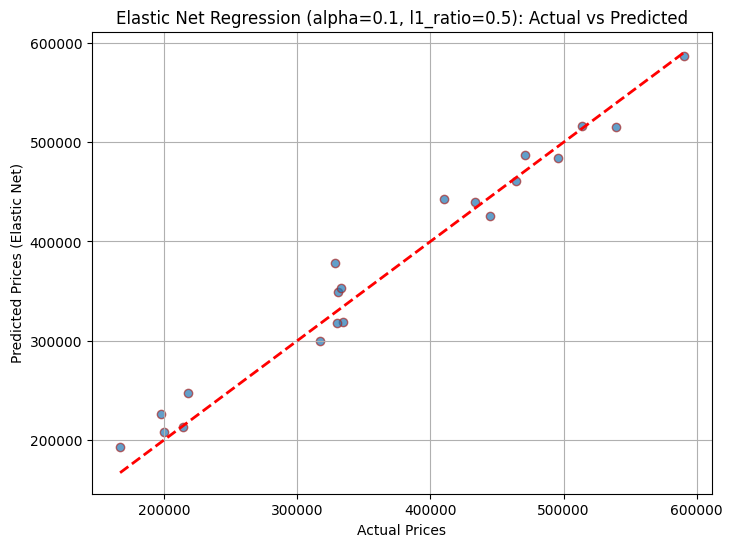

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler # Already imported
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 10. Elastic Net Regression ---")

# Ensure features are scaled (use X_train_scaled, X_test_scaled)
# scaler = StandardScaler() # Define/fit if not already done
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize Elastic Net model
# alpha: Overall strength of regularization
# l1_ratio: The mixing parameter (0=Ridge, 1=Lasso)
enet_alpha = 0.1 # Adjust as needed
enet_l1_ratio = 0.5 # Mix of L1 and L2 (adjust as needed)
print(f"Using Elastic Net Regression with alpha={enet_alpha}, l1_ratio={enet_l1_ratio}")
enet_reg = ElasticNet(alpha=enet_alpha, l1_ratio=enet_l1_ratio, random_state=42, max_iter=10000) # Increase max_iter if needed

# Train the model
enet_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_enet = enet_reg.predict(X_test_scaled)

# Evaluate the model
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

print(f"\nCoefficients (Scaled Features): {np.round(enet_reg.coef_, 2)}")
print(f"Number of non-zero coefficients: {np.sum(enet_reg.coef_ != 0)} out of {X_train_scaled.shape[1]}") # Check for feature selection
print(f"Intercept: {enet_reg.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse_enet:.2f}")
print(f"R-squared (R²): {r2_enet:.4f}")

# Compare coefficients with Lasso/Ridge if desired
# print(f"\nComparison of Coefficients (Scaled Data):")
# print(f"Lasso Regression (alpha={lasso_alpha}): {np.round(lasso_reg.coef_, 2)}") # Requires lasso_reg object
# print(f"Ridge Regression (alpha={ridge_alpha}): {np.round(ridge_reg.coef_, 2)}") # Requires ridge_reg object
# print(f"Elastic Net (alpha={enet_alpha}, l1_ratio={enet_l1_ratio}): {np.round(enet_reg.coef_, 2)}")

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_enet, alpha=0.7, edgecolors='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Elastic Net)")
plt.title(f"Elastic Net Regression (alpha={enet_alpha}, l1_ratio={enet_l1_ratio}): Actual vs Predicted")
plt.grid(True)
plt.show()


--- 11. Stepwise Regression (Forward Selection using SFS) ---
Starting Forward Selection...
Forward Selection finished in 0.07 seconds.

Selected features (2): ['Size_SqFt', 'Age_Years']
Shape of data after selection: (80, 2)

Coefficients for selected features:
Size_SqFt    149.255326
Age_Years   -540.925146
dtype: float64
Intercept: 75837.26

Mean Squared Error (MSE) on selected features: 378143199.95
R-squared (R²) on selected features: 0.9749


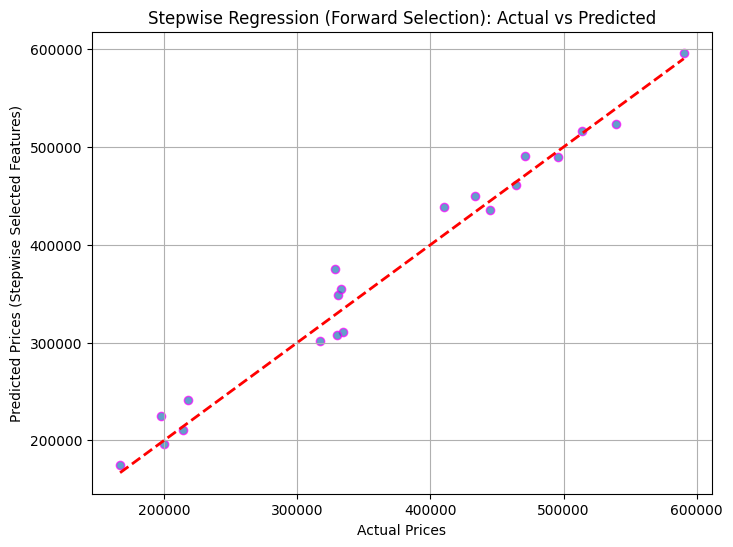

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import time # To time the process

print("\n--- 11. Stepwise Regression (Forward Selection using SFS) ---")

# We typically use non-scaled features here if interpreting based on p-values (not done in SFS directly),
# but SFS based on scoring (like R2) can work with scaled or unscaled. Let's use original features.

# Define the base estimator (Linear Regression)
base_lr = LinearRegression()

# Initialize Sequential Feature Selector
# direction='forward': Start with 0 features, add one by one
# n_features_to_select='auto' (or integer): 'auto' tries to find optimal based on score plateau/drop
# cv: Cross-validation folds for scoring
# scoring: Metric to evaluate feature subsets (e.g., 'r2', 'neg_mean_squared_error')
# n_jobs=-1: Use all CPU cores
sfs = SequentialFeatureSelector(base_lr,
                              n_features_to_select='auto', # Let it decide based on score
                              direction='forward',
                              scoring='r2', # Maximize R-squared
                              cv=5, # 5-fold cross-validation
                              n_jobs=-1,
                              tol=0.001) # Stop if score improvement is less than tol

print("Starting Forward Selection...")
start_time = time.time()
sfs.fit(X_train, y_train) # This can take some time
end_time = time.time()
print(f"Forward Selection finished in {end_time - start_time:.2f} seconds.")

# Get the selected features
selected_features_mask = sfs.get_support()
selected_features_names = X_train.columns[selected_features_mask]
print(f"\nSelected features ({sfs.n_features_to_select_}): {list(selected_features_names)}")

# Transform the data to include only selected features
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
print(f"Shape of data after selection: {X_train_sfs.shape}")

# Train a final Linear Regression model using only the selected features
final_lr_sfs = LinearRegression()
final_lr_sfs.fit(X_train_sfs, y_train)

# Make predictions
y_pred_sfs = final_lr_sfs.predict(X_test_sfs)

# Evaluate the model
mse_sfs = mean_squared_error(y_test, y_pred_sfs)
r2_sfs = r2_score(y_test, y_pred_sfs)

# Get coefficients for the selected features
coef_sfs = pd.Series(final_lr_sfs.coef_, index=selected_features_names)
print(f"\nCoefficients for selected features:\n{coef_sfs}")
print(f"Intercept: {final_lr_sfs.intercept_:.2f}")
print(f"\nMean Squared Error (MSE) on selected features: {mse_sfs:.2f}")
print(f"R-squared (R²) on selected features: {r2_sfs:.4f}")

# Compare with R² from full Linear Regression (run lin_reg first)
# print(f"R² from full Linear Regression: {r2_lin:.4f}") # Requires r2_lin variable

# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sfs, alpha=0.7, edgecolors='magenta')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Stepwise Selected Features)")
plt.title("Stepwise Regression (Forward Selection): Actual vs Predicted")
plt.grid(True)
plt.show()


--- 12. Bayesian Linear Regression (using BayesianRidge) ---
Using Bayesian Ridge Regression

Coefficients (Means of posterior distributions): [0. 0. 0.]
Intercept (Mean of posterior distribution): 390675.30
Estimated precision of weights (lambda_): 0.7543
Estimated precision of noise (alpha_): 0.0000

Mean Squared Error (MSE): 15644143992.71
R-squared (R²): -0.0385


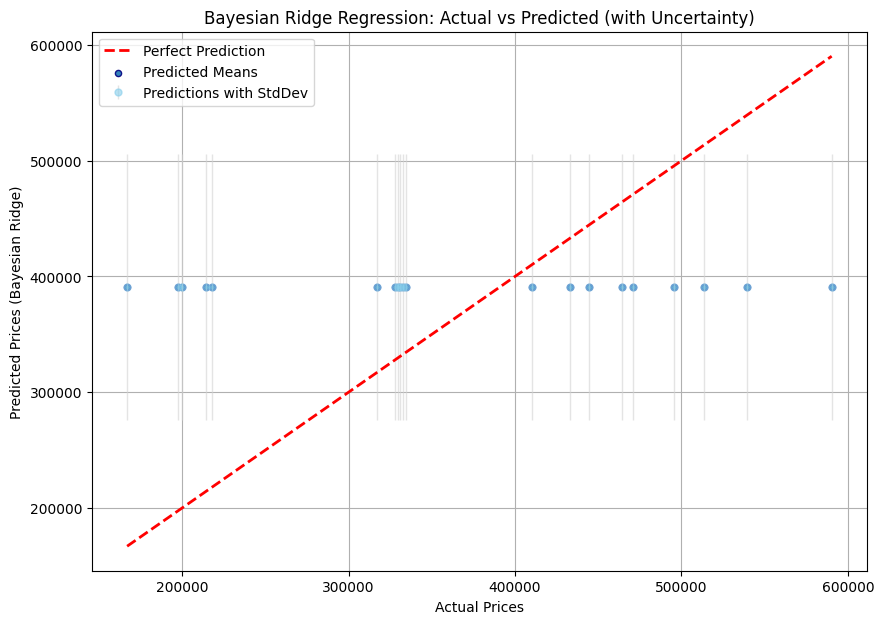

In [30]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler # Already imported
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 12. Bayesian Linear Regression (using BayesianRidge) ---")

# Ensure features are scaled (use X_train_scaled, X_test_scaled)
# scaler = StandardScaler() # Define/fit if not already done
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize Bayesian Ridge model
# Key parameters (alpha_1, alpha_2, lambda_1, lambda_2) relate to the Gamma priors for alpha and lambda (precision parameters)
# Often, the defaults work well, or they are estimated from the data (fit_intercept=True helps)
# n_iter: Number of iterations for the optimization algorithm
br_reg = BayesianRidge(max_iter=300, fit_intercept=True, compute_score=True)

print(f"Using Bayesian Ridge Regression")

# Train the model
br_reg.fit(X_train_scaled, y_train)

# Make predictions
# predict can also return standard deviation of predictions if return_std=True
y_pred_br, y_std_br = br_reg.predict(X_test_scaled, return_std=True)

# Evaluate the model
mse_br = mean_squared_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)

# Coefficients and Intercept are the means of their posterior distributions
print(f"\nCoefficients (Means of posterior distributions): {np.round(br_reg.coef_, 2)}")
print(f"Intercept (Mean of posterior distribution): {br_reg.intercept_:.2f}")
# Estimated precision parameters (inverse variance)
print(f"Estimated precision of weights (lambda_): {br_reg.lambda_:.4f}")
print(f"Estimated precision of noise (alpha_): {br_reg.alpha_:.4f}")

print(f"\nMean Squared Error (MSE): {mse_br:.2f}")
print(f"R-squared (R²): {r2_br:.4f}")

# Visualize Predictions vs Actual with uncertainty
plt.figure(figsize=(10, 7))
plt.errorbar(y_test, y_pred_br, yerr=y_std_br, fmt='o', color='skyblue', ecolor='lightgray',
             elinewidth=1, capsize=0, alpha=0.6, markersize=5, label='Predictions with StdDev')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.scatter(y_test, y_pred_br, alpha=0.9, edgecolors='navy', s=20, label='Predicted Means') # Plot means clearly
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Bayesian Ridge)")
plt.title("Bayesian Ridge Regression: Actual vs Predicted (with Uncertainty)")
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution of coefficients if needed (requires access to full posterior, not just mean/std from sklearn)
# Libraries like PyMC or Stan would be needed for full posterior analysis.
# BayesianRidge gives the mean coefficient values:
coef_means = br_reg.coef_
# It doesn't directly provide the std dev of the coefficients, but we can see lambda_ (precision of weights)